### LA CRISE ECONOMIQUE EN BELGIQUE ENTRE 1929 ET 1933

###Il est question de réaliser une étude comparative de deux journaux belges: Le Drapeau Rouge et La Libre Belgique; 
afin de voir les secteurs mis en avant pendant cette période

### I- Création de nos corpus d'analyse


###A partir des fichiers extraits de la base de données CAMILLE, nous allons créer nos deux grands corpus d'analyse

In [86]:
## IMPORTS
import os
import textract

#Le dossier Data1 est constitué des fichiers relatifs aux articles publiés dans le journal Le Drapeau Rouge pendant ladite période (1929-1933)

In [87]:
Data_path1 = '../data/DataRouge'
if not os.path.exists(Data_path1):
    os.mkdir(Data_path1)

#Le dossier Data2 quant à lui, est constitué d'articles publiés dans le journal La Libre Belgique

In [88]:
Data_path2 = '../data/DataLibre'
if not os.path.exists(Data_path2):
    os.mkdir(Data_path2)

##Création du corpus du journal Drapeau Rouge

In [89]:
with open("../data/DataRouge.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(Data_path1):
        if file.endswith(".txt"):
            with open(os.path.join(Data_path1, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())


##Création du corpus du journal La Libre Belgique

In [90]:
with open("../data/DataLibre.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(Data_path2):
        if file.endswith(".txt"):
            with open(os.path.join(Data_path2, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())
                

##Vérification du nombre de fichiers contenus dans chaque corpus

In [91]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [92]:
Data_path1 = "../data/DataRouge/"
files = sorted(os.listdir(Data_path1))
len(files)

501

In [15]:
Data_path2 = "../data/DataLibre/"
files = sorted(os.listdir(Data_path2))
len(files)

500

#Nous venons ainsi de transformer les données que nous avons précedemment  extrait de la data base CAMILLE afin de constituer les corpus que nous allons ensuite exploiter tout au long de notre investigation.

## II- Extraction des keywords

##Dans cette étape, il est question d'extraire une liste de mots clés pour chacun de nos corpus afin de constater de potentielles similitudes entre les deux. 

In [16]:
#Importation de la librairie Yake
import os
import yake

In [17]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=100)
kw_extractor

##Extraction des mots clés de chacun des documents des corpus 1 et 2

In [93]:
##Corpus1
for f in sorted(os.listdir(Data_path1))[:5]:
    text1 = open(os.path.join(Data_path1, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text1)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 1:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB1051_1929-01-04_01-00002.txt mentions these keywords: ans, l'année, heures, ouvriers, PARTI, Peuple, camarades, questions, travail, c'est, salaires, jeunes, VIE, question, Conférence, congrès, pays, discussion, DIT, lutte, camarade, usines, ouvrier, faire, politique, organisations, rationalisation, Belgique, travailleurs, formule, Comité, temps, métallurgistes, déjà, guerre, Sénat, délégué, nouvelle, jeune, serait, situation, ies, bonne, devez, classe, gros, gouvernement, Belge, nationale, Gazette, prochain, seulement, lieu, jour, jours, d'organisation, fédérations, résolution, base, d'ailleurs, faut, qu'ils, qu'il, kilomètres, réunion, dernier, menace, cle, d'un, année, économique, petits, capitalistes, bail, libéraux, élections, voir, Central, cours, patrons...
KB_JB1051_1929-01-04_01-00004.txt mentions these keywords: film, films, cle, heures, janvier, nous, Bruxelles, Franco, d'un, jeunesse, cinéma, c'est, Mors, Poadovhinc, DRAPEAST, Parallèle, Prix, local, Ici, rayon, Jes, te

In [94]:
#Corpus2
for f in sorted(os.listdir(Data_path2))[:5]:
    text2 = open(os.path.join(Data_path2, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text2)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 1:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB427_1929-01-26_01-00001.txt mentions these keywords: Chambre, C'est, SAINT, communiste, gouvernement, Soviets, Don, qu'il, Congrès, l'année, Bruxelles, dons, pays, février, Comité, n'est, avons, crise, Gilson, domaine, Internationale, propos, BONAVENTURE, Van, Samedi, TTT, s'est, qu'on, parce, cours, esprit, MAILLAUD, fois, vieux, l'aviation, ministère, général, MARRONS, Russie, Action, politique, Paris, grande, mouvement, Ville, situation, lieu, puis, faut, moteur, moteurs, janvier, compte, vient, faire, parlementaire, Ministre, nationale, conseil, amis, développement, OUVRIERS, anticommuniste, développer, d'une, philosophie, reste, professeur, Duché, ans, temps, d'un, déjà, prochain, colonies, d'être, Rvck, matériel, Peut-être...
KB_JB427_1929-01-30_01-00003.txt mentions these keywords: d'un, Chambre, président, d'une, juillet, août, correspondant, FRANCE, fut, ans, qu'il, Mme, belge, Lundi, Conseil, gouvernement, juin, s'est, rue, C'est, Pacquement, Poincaré, suite, serait, dit

##Extraction de mots clés sur l'ensemble des documents de chaque corpus

In [144]:
# Extraire les mots clés du corpus 1
keywords1 = kw_extractor.extract_keywords(text1)
keywords1

[('DRAPEAU ROUGE', 0.009825864865179284),
 ('gouvernement', 0.010924012243516985),
 ('lutte', 0.015118792383451716),
 ('guerre', 0.018299273402754893),
 ('Secteur privé', 0.018693880081564092),
 ('politique', 0.019924442114906474),
 ('Hymans', 0.020342370861384827),
 ('ROUGE', 0.02317250908753769),
 ("C'est", 0.02354431207840583),
 ('travailleurs', 0.0248766483006499),
 ('Japon', 0.02500129620727912),
 ('gouvernement belge', 0.025073094913860793),
 ("d'une", 0.026678403636781152),
 ('plan', 0.027899926682999895),
 ('Secteur', 0.0290529880992989),
 ('Belgique', 0.02963437552675419),
 ('faut', 0.029859034155306653),
 ('Chine', 0.03161841424225701),
 ('privé', 0.036208142745491265),
 ('jour', 0.03897381843343045),
 ('DRAPEAU', 0.039674273170045),
 ('bourgeoisie', 0.044447896445256735),
 ('BELGE', 0.04574271524834081),
 ("l'économie", 0.0478938182638601),
 ('Macia', 0.05185031426295969),
 ('Tchang Kaï Chek', 0.05415447182867321),
 ("d'un gouvernement", 0.05581481065120737),
 ('pays', 0.056

In [151]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords1:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['DRAPEAU ROUGE',
 'Secteur privé',
 'gouvernement belge',
 "d'un gouvernement",
 'GUERRE CONTINUE',
 "d'une lutte",
 "d'une politique",
 "l'armée rouge",
 "qu'il faut",
 'Tchang Kaï',
 'Kaï Chek',
 'partis politiques',
 'politique agressive',
 'préoccupations politiques',
 'Hymans continue',
 'Républiques Soviétiques',
 'unc économie',
 'Paul Hymans']

In [146]:
# Extraire les mots clés du corpus 2
keywords2 = kw_extractor.extract_keywords(text2)
keywords2

[('Bdltiou des journaui', 0.012481523713523174),
 ('France', 0.019984819357699198),
 ('Belgique', 0.020013028844137276),
 ('Libre Belgique', 0.024762236554906652),
 ('faire', 0.02961632736229865),
 ("d'une", 0.03234593559661862),
 ('Bruxelles', 0.03699189764864661),
 ("l'Allemagne", 0.03850667520046884),
 ('journal', 0.040589643732541966),
 ('point', 0.04110391826576606),
 ("qu'il", 0.041158040206621574),
 ('politique', 0.04475235087481609),
 ("l'année", 0.04661913033814739),
 ('Société des Nations', 0.04851524637802194),
 ('Xle Semaine Sociale', 0.05162934418205797),
 ('BON', 0.05200475236057137),
 ("c'est", 0.05243183694159262),
 ("d'un", 0.05634168740500791),
 ('Gorce', 0.05748945326387777),
 ('Semaine Sociale', 0.057651226333820305),
 ('économique', 0.05956414626497345),
 ('Ruysselede', 0.061568926347913375),
 ('catholique', 0.06273022730277486),
 ('Sociale Universitaire catholique', 0.06277421808641491),
 ('Dimanche', 0.06306931605631826),
 ('Montasrna-a', 0.06306931605631826),
 (

In [152]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords2:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Libre Belgique',
 'Semaine Sociale',
 "Légion d'honneur",
 'Xle Semaine',
 'président Roosevelt',
 'Patriote Illustré',
 'Universitaire catholique',
 'situation économique',
 'pris fin',
 "d'une politique",
 "d'une société",
 "qu'il fut",
 'faire partie',
 'second plan',
 'faire place',
 'numéro Edition',
 'paix monétaire']

### III-Constatation des déchets et nettoyage

##Dans cette partie, il est question d'épurer nos corpus. Pour ce faire, nous allons commencer par constater les déchets présents dans chacun d'eux, ensuite nous allons créer une liste de stopwords et enfin nous allons créer une fonction de nettoyage que nous allons appliquer sur chaque corpus.

1-Importation des librairies et stopwords

In [23]:
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kilia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2- Ecrire tout le contenu des corpus dans un fichier temporaire et Constater des déchets

###Ecrire tout le contenu des corpus 1 et 2 dans un fichier temporaire

In [24]:
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'DataRouge'), 'w', encoding='utf-8') as f:
    f.write(' '.join(text1 ))

In [25]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, 'DataLibre'), 'w', encoding='utf-8') as f:
    f.write(' '.join(text2))

##Constater les déchets

In [26]:
##Corpus 1
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, 'DataRouge.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:600]


"du Sénat décidèrent do maintenir le tail do tro s ans. Depuis lors, les formules n'ont pas ; manqué. ±.*2a réformistes, un groupe de joathobques et uno demi-douzaino de libéraux sont pour une formule de neuf ans. Une formule do neuf ans qui ménage d'ailleurs singulièrement les intérêts Ides gros proçriéta'res, qui prétond même qu'ils trouveront mieux leur compte, en j définitive, que sous le régime aetuel. J?lb le gouvernement pour rétablir la co- l|__aion de sa majorité s'est -livré à des liûiarchandages avc_ les divers gtoupes de av-s souteneurs. De ces tractations est sortie une pro- | posi"

In [27]:
## Corpus Data2
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'DataLibre.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:600]

'r Samedi 26 janvier 1929 centimes le numéro jffidifciori * bG™ année — N° 26 B^déto J «nuon J» journaux du PATniOTE *TTT DMl j I1 »ji.na-Horoe3-Pota,goroa. Bruxelles 1 RMacUon . . . Wa.m Tél.) Âdai\'"\'. »an". Abinio" vva.su 44^1, -aJègraplUqn. CUbl» Snlxeilsa, A BO.\\.\\KMI-:.\\T* 11»»!» jjjd-rt.-Unan.eBOO 8 mois. 36.00; 3 mois, 19.00 ^ntîlt- Un an, 110 ir.; 6 m. 60 fr.; a m. 80 fr. sïtrtt pays\'. SuiTant conventions postales. m . * » 18k EdiL * - 22k. EdiL • 1km. VOIR dans le. ...... .-s» ..a Patriote Illustré .......... DE CETTE SEMAINE Lo princesse Marina de Suéde et son fiancé LA MAMF.iS . ATI '

3- Liste de stop words

In [73]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "que", "voici", "parmi", "chaque", "leurs",
       "lequel", "alors", "laquelle", "trop", "fin", "tant", "ceux", "rien", "grandes",
       "tÃ©l", "dem", "trÃ¨s", "app", "part", "ans","cuis","tÃ©lÃ©ph","sociÃ©tÃ©", "rem","rue", 
       "gar", "grand", "ecrire", "place","monsieur", "quelques", "midi", "brux", "ecrire", "une", "sociÃ©tÃ©",
       "tél", "ecr", "téléph","vitae", "etc", "bur", "réf", "terr","très", "prés", "déjà", "pers",
       "effet", "fem","également", "mén", "vers", "toute", "trav","dès", "porte", "vis", "toujours",
       "démi", "bel", "celui", "jour", "chez", "mod", "samedi", "madame", "liv","tel", "bonne",
       "bon", "mois", "temps", "dimanche","saint", "bonnes", "peu", "près", "villa", "engage", "soir", "libre",
       "cherche", "vendre", "car", "demande", "etat","décès", "partie", "matin", "eau", "reprise","rossel", "premier",
       "première","maison", "jours","avant","cependant", "vue", "but","grande", "adresser", "dame", "situation",
       "cours","conseil", "france","elles","heures", "question", "lieu", "aujourd","pays", "franc", "dernier", "devant",
       "vient", "certains","nouvelle", "séance", "catholique", "catholiques", "point", "année", "projet", "ordre", 
       "français", "gouvernement", "ministre", "président","belgique","mineurs", "chefs","général","plusieurs", "nouveau"
       "rapport","nombre", "hui", "surtout","drapeau", "rouge","bruxelles", "corresondant", "politique",
       "ici", "suite", "paris", "londres", "moment", "affaire", "ensuite", "générale"]
sw = set(sw)

4- Création d'une fonction de nettoyage pour chaque corpus

In [74]:

# Corpus Data1
def clean_text(DataRouge, folder=None):
    if folder is None:
        input_path = f"{DataRouge}.txt"
        output_path = f"{DataRouge}_clean.txt"
    else:
        input_path = f"{folder}/{DataRouge}.txt"
        output_path = f"{folder}/{DataRouge}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'


In [75]:
# Corpus Data2
def clean_text(DataLibre, folder=None):
    if folder is None:
        input_path = f"{DataLibre}.txt"
        output_path = f"{DataLibre}_clean.txt"
    else:
        input_path = f"{folder}/{DataLibre}.txt"
        output_path = f"{folder}/{DataLibre}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'


#Appliquer les fonctions à leur corpus respectif

In [76]:

clean_text ('DataRouge', folder =temp_path)

'Output has been written in ../data/tmp/DataRouge_clean.txt!'

In [77]:
clean_text ('DataLibre', folder =temp_path)

'Output has been written in ../data/tmp/DataLibre_clean.txt!'

In [78]:
with open(os.path.join(temp_path, f'DataRouge_clean.txt'), 'r', encoding= 'utf-8') as f:
    after1 = f.read()

after1[:500]

'sénat décidèrent maintenir tail tro lors formules manqué réformistes groupe joathobques uno demi douzaino libéraux formule neuf formule neuf ménage ailleurs singulièrement intérêts ides gros proçriéta res prétond trouveront mieux compte définitive régime aetuel rétablir majorité livré liûiarchandages divers gtoupes souteneurs tractations sortie pro position laisse petits cultivateurs exigences propriétaires maie avantago ouvern mtmt réacitionnaire essayer fois dislocation base parle meuitaire jw'

In [79]:
with open(os.path.join(temp_path, f'DataLibre_clean.txt'), 'r', encoding= 'utf-8') as f:
    after2 = f.read()

after2[:500]

'janvier centimes numéro jffidifciori déto nuon journaux patniote ttt dml pota goroa rmacuon âdai abinio vva ajègrapluqn cubl snlxeilsa kmi jjjd unan eboo ntîlt sïtrtt suitant conventions postales edil edil voir patriote illustré semaine princesse marina suéde fiancé mamf ati hoover expédition byrd pôle sud vuei artistique tef ivionde ncice partout numéro action communiste action anticommuniste personnalité tient tho jonctij courant mouve bolchevique fatrl partout combattre jrumxement écrit inuti'

## IV- Les Nuages de mots (wordcloud)

##Dans cette partie, il nous allons afficher une liste de mots les plus fréquents dans chacun de nos corpus, et ensuite, sur base de  ces listes, créer un nuage de mots pour chacun d'eux

1- Afficher les mots les plus fréquents dans les corpus 1 et 2

In [80]:
#Corpus1
frequencies1 = Counter(after1.split())
print(frequencies1.most_common(10))

[('ouvriers', 6882), ('parti', 5340), ('travailleurs', 4889), ('lutte', 4831), ('travail', 3997), ('guerre', 3341), ('social', 3044), ('camarades', 2567), ('salaires', 2557), ('grève', 2499)]


In [81]:
#Corpus2
frequencies2 = Counter(after2.split())
print(frequencies2.most_common(10))

[('crise', 3345), ('millions', 2676), ('économique', 2502), ('prix', 2315), ('francs', 2139), ('parti', 1978), ('allemagne', 1957), ('loi', 1949), ('travail', 1855), ('chambre', 1828)]


2- Créer, afficher et stocker un nuage de mots pour chaque corpus

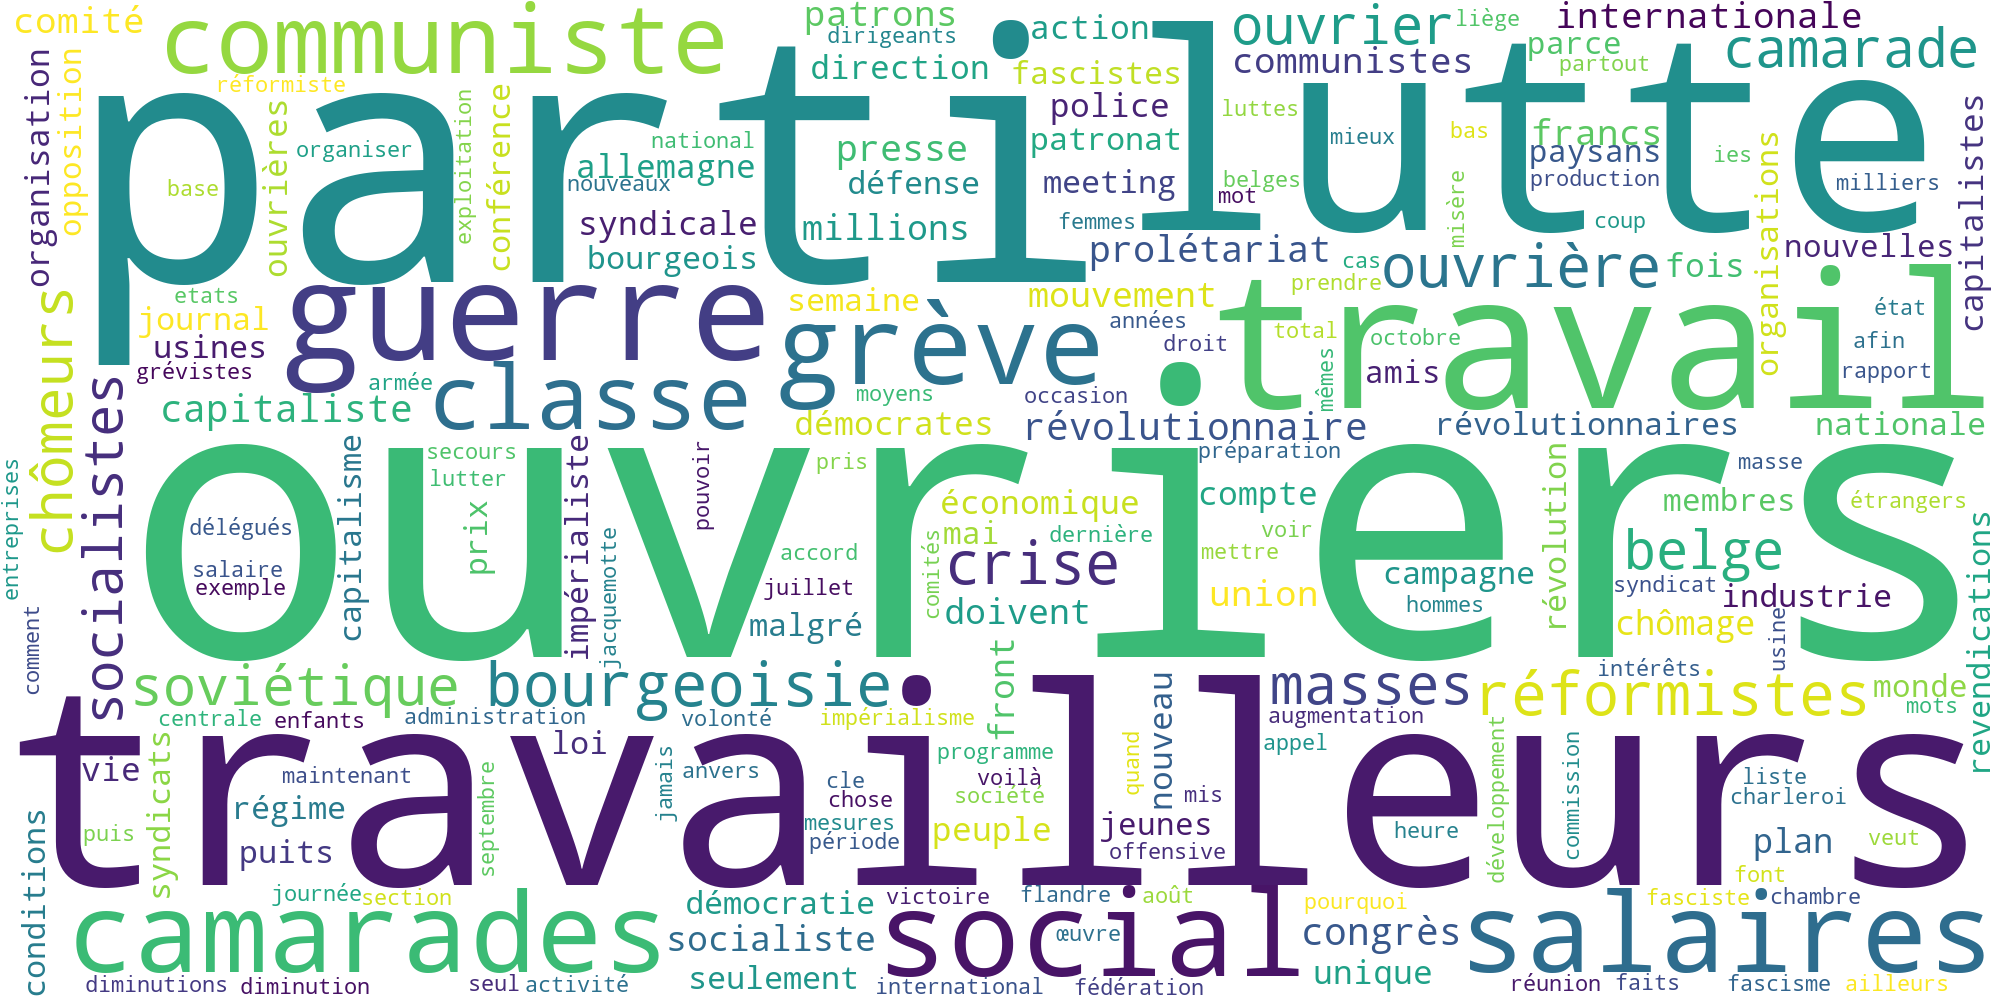

In [82]:
#Corpus1
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies1)
cloud.to_file(os.path.join(temp_path, f"DataRouge.png"))
Image(filename=os.path.join(temp_path, f"DataRouge.png"))

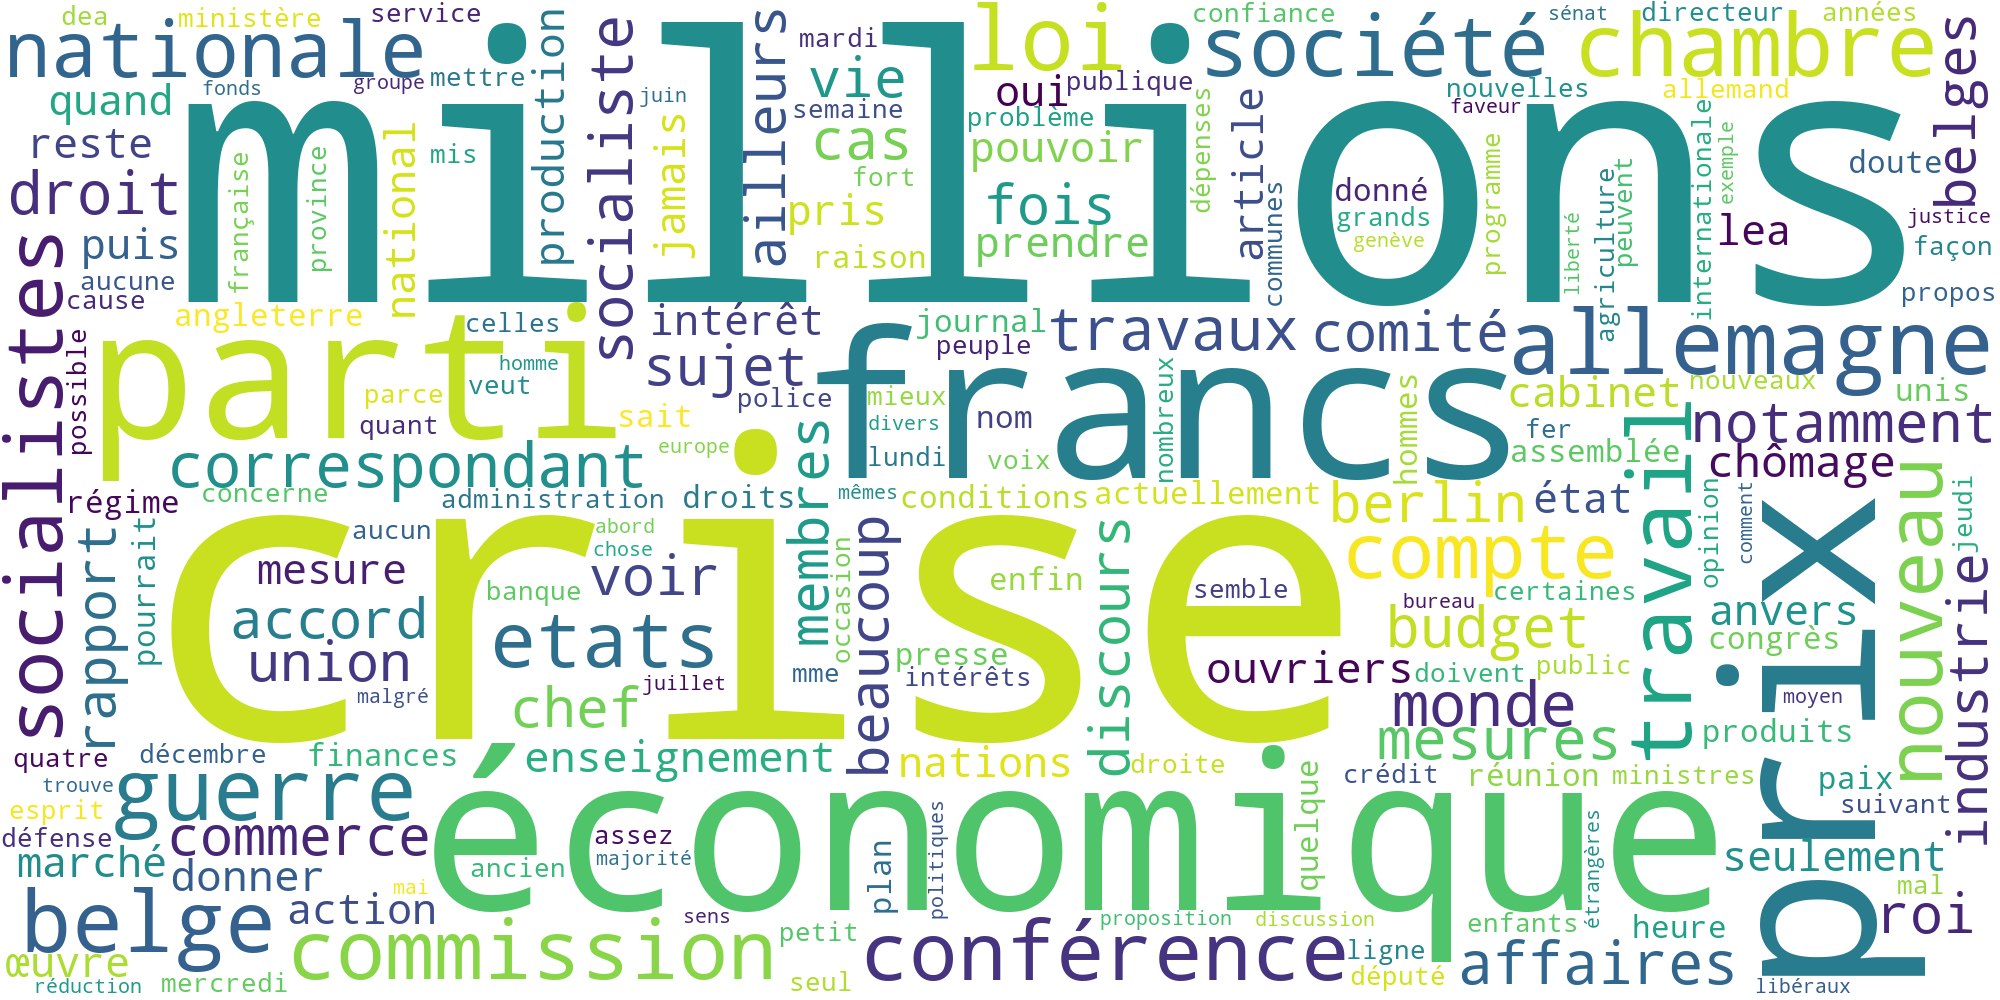

In [85]:
#Corpus2
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies2)
cloud.to_file(os.path.join(temp_path, f"DataLibre.png"))
Image(filename=os.path.join(temp_path, f"DataLibre.png"))

## V- Reconnaissances d'entités nommées

##Toujours dans le but de comparer nos deux corpus, nous allons à présent générer pour chacun d'eux une liste d'entités nommées de personnes, de lieux et d'organisations 

##importation des librairies

In [268]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [269]:
nlp = spacy.load('fr_core_news_md')

# 1- Traiter les corpus 1 et 2

In [273]:
%%time
# Traiter le corpus1

doc1 = nlp(text1)

CPU times: total: 1.12 s
Wall time: 1.16 s


In [274]:
%%time
# Traiter le corpus 2

doc2 = nlp(text2)

CPU times: total: 1.08 s
Wall time: 1.29 s


# 2- Compter, trier et imprimer les entités nommées de personnes

#Corpus 1

In [276]:
#Compter
people1 = defaultdict(int)
for ent in doc1.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people1[ent.text] += 1

In [277]:
# Trier et imprimer

sorted_people1 = sorted(people1.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people1[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

M. Hymans apparait 8 fois dans le corpus
Macia apparait 5 fois dans le corpus
Hitler apparait 4 fois dans le corpus
Soviets apparait 4 fois dans le corpus
P. O. B. apparait 3 fois dans le corpus
Tchang Kaï Chek apparait 2 fois dans le corpus
Dimitrov apparait 2 fois dans le corpus
Popov apparait 2 fois dans le corpus
Tanev apparait 2 fois dans le corpus
M. de Man apparait 2 fois dans le corpus
U. R. S. S. apparait 2 fois dans le corpus
Hitlc apparait 1 fois dans le corpus
I ••;• apparait 1 fois dans le corpus
n\ 1 apparait 1 fois dans le corpus
Poincaré apparait 1 fois dans le corpus
John Simon apparait 1 fois dans le corpus
Mussolini apparait 1 fois dans le corpus
Frqnce apparait 1 fois dans le corpus
Tordre apparait 1 fois dans le corpus
Paul Hymans apparait 1 fois dans le corpus
M. Bénès apparait 1 fois dans le corpus
M. Titulesco? apparait 1 fois dans le corpus
R. S. S. apparait 1 fois dans le corpus
Bénès apparait 1 fois dans le corpus
Paul Boncour apparait 1 fois dans le corpus
a

#Corpus 2

In [280]:
#Compter
people2 = defaultdict(int)
for ent in doc2.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people2[ent.text] += 1

In [283]:
# Trier et imprimer

sorted_people2 = sorted(people2.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people2[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Pierre de la Gorce apparait 3 fois dans le corpus
Hitler apparait 2 fois dans le corpus
T. S. F. de Ruysselede apparait 2 fois dans le corpus
Bruxellea VBOV.MHr apparait 1 fois dans le corpus
LIBRE i apparait 1 fois dans le corpus
Patriote Illustré apparait 1 fois dans le corpus
Iguanodons apparait 1 fois dans le corpus
Talle apparait 1 fois dans le corpus
Roosevelt apparait 1 fois dans le corpus
Intéressant apparait 1 fois dans le corpus
président Roosevelt apparait 1 fois dans le corpus
Fernand BAUDHUIN apparait 1 fois dans le corpus
Professeur apparait 1 fois dans le corpus
Nous apparait 1 fois dans le corpus
MM. Victor apparait 1 fois dans le corpus
Louis Jourdain apparait 1 fois dans le corpus
Michel apparait 1 fois dans le corpus
Gudule apparait 1 fois dans le corpus
M. le Ministre de l'Education Nationale apparait 1 fois dans le corpus
M. Pierre de la Gorce apparait 1 fois dans le corpus
M. Anatole de Monzie apparait 1 fois dans le corpus
Georges Goyau apparait 1 fois dans le co

# 3- Compter, trier et imprimer les entités nommées d'organisations

#Corpus1

In [284]:
# Compter
organisation1 = defaultdict(int)
for ent in doc1.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation1[ent.text] += 1

In [286]:
# Trier et imprimer

sorted_organisation1 = sorted(organisation1.items(), key=lambda kv: kv[1], reverse=True)

for organisation1, freq in sorted_organisation1[:60]:
    print(f"{organisation1} apparait {freq} fois dans le corpus")

Union Nationale apparait 2 fois dans le corpus
Ver- 1 apparait 1 fois dans le corpus
Conseil apparait 1 fois dans le corpus
Comité des Forges apparait 1 fois dans le corpus
ordre international de Versailles apparait 1 fois dans le corpus
Kuomintang apparait 1 fois dans le corpus
Rivalités impérialistes ct guerres apparait 1 fois dans le corpus
Tokio apparait 1 fois dans le corpus
Armée rouge chinoise apparait 1 fois dans le corpus
Armée Rouge apparait 1 fois dans le corpus
létariat ie apparait 1 fois dans le corpus
Parti Communiste apparait 1 fois dans le corpus
Congo! apparait 1 fois dans le corpus
Société Générale apparait 1 fois dans le corpus
Etat belge! apparait 1 fois dans le corpus
GAND apparait 1 fois dans le corpus
notre Internationale apparait 1 fois dans le corpus
Union des Républiques Socialistes Soviétiques apparait 1 fois dans le corpus
Comité d'Action pour la Reconnaissance apparait 1 fois dans le corpus
Républiques Soviétiques apparait 1 fois dans le corpus
Chambre appa

#Corpus2

In [287]:
# Compter
organisation2 = defaultdict(int)
for ent in doc2.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation2[ent.text] += 1

In [288]:
# Trier et imprimer

sorted_organisation2 = sorted(organisation2.items(), key=lambda kv: kv[1], reverse=True)

for organisation2, freq in sorted_organisation2[:60]:
    print(f"{organisation2} apparait {freq} fois dans le corpus")

Reich apparait 3 fois dans le corpus
Légion d'honneur apparait 3 fois dans le corpus
Société des Nations apparait 3 fois dans le corpus
Impérial Airways apparait 2 fois dans le corpus
Eh Angleterre apparait 1 fois dans le corpus
Souhaitons apparait 1 fois dans le corpus
Chambres apparait 1 fois dans le corpus
Parlement apparait 1 fois dans le corpus
Université de Louvain apparait 1 fois dans le corpus
notre Journal apparait 1 fois dans le corpus
BILLET apparait 1 fois dans le corpus
Ministre de l'Education Nationale apparait 1 fois dans le corpus
Ministre de l'Instruction Publique apparait 1 fois dans le corpus
Académie des Sciences Morales apparait 1 fois dans le corpus
Académie française apparait 1 fois dans le corpus
Corporation des Publicistes Chrétiens apparait 1 fois dans le corpus
Association Catholique des Artésiens apparait 1 fois dans le corpus
Conseil paroissial apparait 1 fois dans le corpus
Laboratoire Central apparait 1 fois dans le corpus
BON DB PUBLI- apparait 1 fois da

# 4-Compter, trier et imprimer les entités de lieux

#Corpus 1

In [289]:
# Compter
location1 = defaultdict(int)
for ent in doc1.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        location1[ent.text] += 1

In [290]:
# Trier et imprimer

sorted_location1 = sorted(location1.items(), key=lambda kv: kv[1], reverse=True)

for location1, freq in sorted_location1[:50]:
    print(f"{location1} apparait {freq} fois dans le corpus")

Etat apparait 8 fois dans le corpus
Belgique apparait 6 fois dans le corpus
la Chine apparait 4 fois dans le corpus
Plan apparait 4 fois dans le corpus
Paris apparait 3 fois dans le corpus
Japon apparait 3 fois dans le corpus
le Japon apparait 3 fois dans le corpus
U. R. S. S. apparait 3 fois dans le corpus
Allemagne apparait 3 fois dans le corpus
Devèze apparait 2 fois dans le corpus
Chine apparait 2 fois dans le corpus
Foukien apparait 2 fois dans le corpus
du Japon apparait 2 fois dans le corpus
de Belgique apparait 2 fois dans le corpus
Bulgarie apparait 2 fois dans le corpus
République apparait 2 fois dans le corpus
Espagne apparait 2 fois dans le corpus
Catalogne apparait 2 fois dans le corpus
Madrid apparait 2 fois dans le corpus
Etats apparait 2 fois dans le corpus
Congo apparait 2 fois dans le corpus
Russie apparait 2 fois dans le corpus
Europe apparait 2 fois dans le corpus
embre apparait 1 fois dans le corpus
^yinaïts apparait 1 fois dans le corpus
Paris I apparait 1 fois da

#Corpus 2

In [291]:
# Compter
location2 = defaultdict(int)
for ent in doc2.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        location2[ent.text] += 1

In [292]:
# Trier et imprimer

sorted_location2 = sorted(location2.items(), key=lambda kv: kv[1], reverse=True)

for location2, freq in sorted_location2[:50]:
    print(f"{location2} apparait {freq} fois dans le corpus")

Allemagne apparait 10 fois dans le corpus
Belgique apparait 7 fois dans le corpus
Bruxelles apparait 6 fois dans le corpus
la France apparait 6 fois dans le corpus
La France apparait 3 fois dans le corpus
Etats apparait 3 fois dans le corpus
Genève apparait 3 fois dans le corpus
Ruysselede apparait 3 fois dans le corpus
Congo apparait 2 fois dans le corpus
Etats-Unis apparait 2 fois dans le corpus
Etat apparait 2 fois dans le corpus
Paris apparait 2 fois dans le corpus
l'Europe apparait 2 fois dans le corpus
Cologne-Bruxelles-Londres apparait 2 fois dans le corpus
Bdltiou apparait 1 fois dans le corpus
A nii. apparait 1 fois dans le corpus
Injustes apparait 1 fois dans le corpus
Indications apparait 1 fois dans le corpus
Patriote apparait 1 fois dans le corpus
Cour d'Assises du Pas-de-Calais apparait 1 fois dans le corpus
Notre-Dame des Champs apparait 1 fois dans le corpus
Pas-de-Calais apparait 1 fois dans le corpus
tsnlr apparait 1 fois dans le corpus
République apparait 1 fois dans

 ### Merci pour votre attention!!!